# Overview

Demographics are only available until 202101, so they will be processed for only 2019-2020.  Given the COVID-19 Pandemic, 
comparing 2019 to 2020 will be valueable.

All data will be imported into a dataframe, then filtered as needed to create views

In [1]:
import pandas as pd
import itertools

import matplotlib.pyplot as plt

year_months = list(itertools.chain(
    *[
        [f"{year}{str(month).zfill(2)}" for month in range(1,13)] 
        for year in range(2019,2021)]))
print(f"Using year months: {year_months}")

Using year months: ['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012']


In [2]:
files = [f"data/JC-{year_month}-citibike-tripdata.csv" for year_month in year_months]

df = pd.concat((pd.read_csv(file) for file in files))
df 

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11689,1750,2020-12-31 23:07:44.0030,2020-12-31 23:36:54.4710,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,40440,Customer,1969,0
11690,1519,2020-12-31 23:18:00.2630,2020-12-31 23:43:19.8590,3184,Paulus Hook,40.714145,-74.033552,3195,Sip Ave,40.730897,-74.063913,46340,Customer,1969,0
11691,1761,2020-12-31 23:31:09.4620,2021-01-01 00:00:31.3290,3195,Sip Ave,40.730897,-74.063913,3270,Jersey & 6th St,40.725289,-74.045572,40907,Customer,1998,1
11692,637,2020-12-31 23:35:45.4640,2020-12-31 23:46:22.7300,3681,Grand St,40.715178,-74.037683,3199,Newport Pkwy,40.728745,-74.032108,42250,Customer,1969,0


In [3]:
df['startdt'] = pd.to_datetime(df['starttime'])
df['startyear'] = pd.DatetimeIndex(df['startdt']).year

In [4]:
df_head = df.head()
df_head

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdt,startyear
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,2019-01-01 03:09:09.711,2019
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,2019-01-01 05:18:00.106,2019
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,2019-01-01 10:36:33.340,2019
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,2019-01-01 12:43:38.643,2019
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,2019-01-01 12:43:39.601,2019


In [5]:
gender_df = df['gender'].value_counts()
gender_df

1    486213
2    176937
0     78599
Name: gender, dtype: int64

<AxesSubplot:>

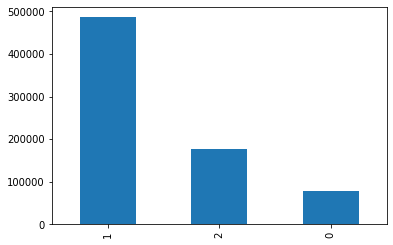

In [6]:
gender_df.plot.bar()

<AxesSubplot:>

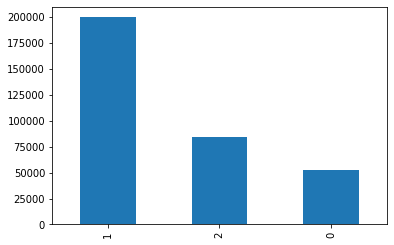

In [7]:
df[df.startdt > '2020-01-01']['gender'].value_counts().plot.bar()

<AxesSubplot:xlabel='startyear,gender'>

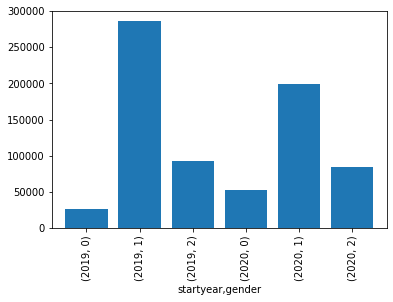

In [8]:
groups = df.groupby(['startyear', 'gender']).size()
groups.plot.bar(width=0.8)

<AxesSubplot:>

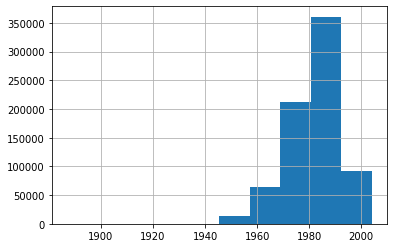

In [9]:
df['birth year'].hist()

<AxesSubplot:>

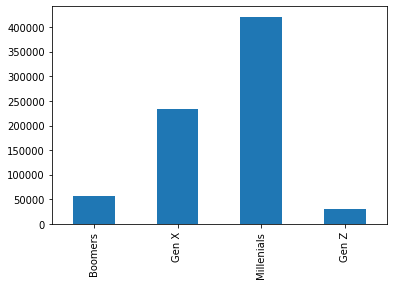

In [10]:
bins=  [1930,     1965,    1980,       1995,    2010]
labels=['Boomers','Gen X','Millenials','Gen Z']

birth_year = pd.cut(df['birth year'], bins=bins, include_lowest=True, labels=labels)

birth_year.value_counts(sort=False).plot.bar()

In [11]:

import math

def distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    
    miles = 0.621371
    
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d*miles


def distance_row(row):
    return distance(
        (row['start station latitude'], row['start station longitude']),
        (row['end station latitude'], row['end station longitude'])
    )

df['distance'] = df.apply(lambda row: distance_row(row), axis=1)

<AxesSubplot:ylabel='Frequency'>

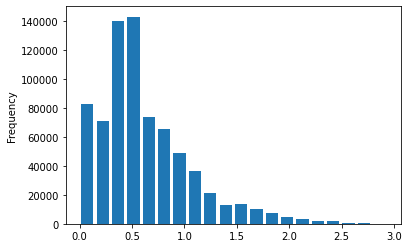

In [12]:
df_under_three = df[df['distance'] < 3]

df_under_three['distance'].plot.hist(rwidth=0.8, bins=20)

<AxesSubplot:ylabel='Frequency'>

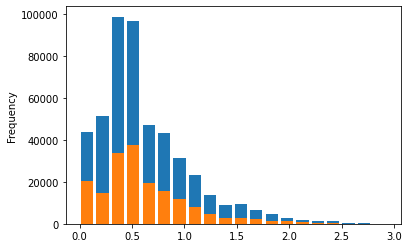

In [19]:
df_under_three[df_under_three['gender'] == 1]['distance'].plot.hist(rwidth=0.8, bins=20)
df_under_three[df_under_three['gender'] == 2]['distance'].plot.hist(rwidth=0.8, bins=20)

In [25]:
mean = df_under_three['distance'].mean()
std = df_under_three['distance'].std()

print(f"[all] => mean: {mean}, std: {std}")

for gndr in [1,2]:
    distance_series = df_under_three[df_under_three['gender'] == gndr]['distance']
    print(f"[{gndr}]   => mean: {distance_series.mean()}, std: {distance_series.std()}")

[all] => mean: 0.618857577953076, std: 0.44373309135689454
[1]   => mean: 0.6232906353259005, std: 0.4342718626225462
[2]   => mean: 0.6041326280024102, std: 0.4227887826510318
